In [90]:
import numpy as np
import matplotlib.pyplot as plt
from PiscesA.constant import colors
from matplotlib import animation, rc
from wand.image import Image
from wand.display import display
%matplotlib inline
rc('animation', html='html5')
np.warnings.filterwarnings('ignore')

In [96]:
def dice_sim(Nsim, Nroll):
    avg = np.array([np.average(np.random.randint(1, 7, Nroll)) for _ in range(1, Nsim)])
    return avg


def hist_anim(frame, Nsim, Nroll):
    # clear axes
    plt.cla()
    # calculate histogram
    cnts, bins = np.histogram(avg[0:frame], bins=np.linspace(1.5, 5.5, 20))
    ctrs = (bins[:-1] + bins[1:]) / 2
    # plot
    plt.step(ctrs, cnts, where='mid', color='black')
    plt.fill_between(ctrs, 0, cnts, step='mid', color=colors[0], alpha=0.8)
    # format/label
    fonts = {'fontsize': 18}
    plt.xlim(1, 6)
    plt.ylim(ymin=0)
    plt.xlabel('Average from {} rolls'.format(Nroll), **fonts)
    plt.ylabel('Frequency of Value', **fonts)
    plt.annotate('Simulation {}'.format(frame), [1.1, 0.98*max(cnts)], **fonts)
    plt.annotate('Sample Mean $\\bar x$ = {0:.2f}'.format(np.mean(avg[0:frame])),
                 [5.8, 0.98*max(cnts)], ha='right', **fonts)
    plt.annotate('Population Mean $\\mu$ = 3.5',
                 [5.8, 0.93*max(cnts)], ha='right', **fonts)
    plt.title('Dice Roll Simulation -- Expectation Value', **fonts)

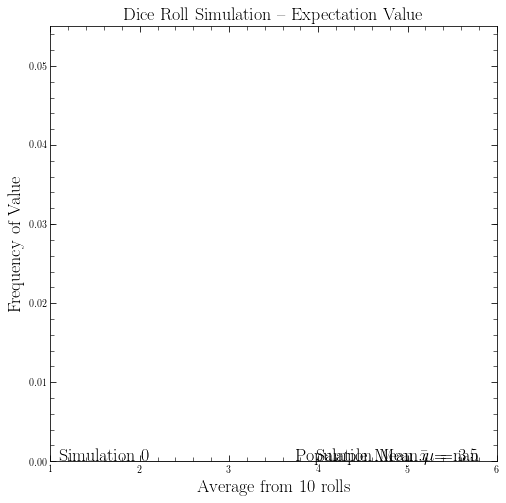

In [97]:
fig = plt.figure(figsize=(8, 8))
Nsim, Nroll = 500, 10
avg = dice_sim(Nsim, Nroll)
animation.FuncAnimation(fig, hist_anim, frames=Nsim, interval=100, fargs=(Nsim, Nroll))